In [62]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
import itertools

df = pd.read_csv("DataOlahFINAL.csv")

pair = df['id_pair'].to_numpy().tolist()
time = df['time_window'].to_numpy().tolist()
df = pd.DataFrame(list(itertools.product(time,pair)), columns=['time_window','idpair'])
df = df.dropna()
df2 = pd.read_csv("DASASETFINALFIXXXXXX.csv")
df2 = pd.DataFrame(df2)
df3 = pd.merge(df, df2, how="left", on=["time_window","idpair"])
df3 = df3.fillna(0)
df3['connected'] = df3['connected'].astype(int)
df3['SpatialLoc'] = df3['SpatialLoc'].astype(int)
df3 = df3.set_index(['time_window'])

print(df3.head(2))

                    idpair  intercontact  SpatialLoc  connected
time_window                                                    
2004-07-19 12:00:00    0,1           0.0           0          0
2004-07-19 12:00:00    0,2           0.0           0          0


In [63]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2609568 entries, 2004-07-19 12:00:00 to 2005-06-21 12:00:00
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   idpair        object 
 1   intercontact  float64
 2   SpatialLoc    int32  
 3   connected     int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 79.6+ MB
None


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import scipy.stats as stats
df3[["intercontactScaled","SpatialLocScaled"]] = stats.zscore(df3[["intercontact","SpatialLoc"]])
#dataScale = scaler.fit(dataScale)
#dataScale = scaler.transform(dataScale)
print(df3.head(3))


                    idpair  intercontact  SpatialLoc  connected  \
time_window                                                       
2004-07-19 12:00:00    0,1           0.0           0          0   
2004-07-19 12:00:00    0,2           0.0           0          0   
2004-07-19 12:00:00    0,4           0.0           0          0   

                     intercontactScaled  SpatialLocScaled  
time_window                                                
2004-07-19 12:00:00           -0.064323         -0.000845  
2004-07-19 12:00:00           -0.064323         -0.000845  
2004-07-19 12:00:00           -0.064323         -0.000845  


In [65]:
vect = df3[['intercontactScaled','SpatialLocScaled']].to_numpy().tolist()
df3['vect'] = vect
dataScaled = df3[['idpair','intercontact','SpatialLoc','intercontactScaled','SpatialLocScaled','vect','connected']]
print(dataScaled.head(3))

                    idpair  intercontact  SpatialLoc  intercontactScaled  \
time_window                                                                
2004-07-19 12:00:00    0,1           0.0           0           -0.064323   
2004-07-19 12:00:00    0,2           0.0           0           -0.064323   
2004-07-19 12:00:00    0,4           0.0           0           -0.064323   

                     SpatialLocScaled  \
time_window                             
2004-07-19 12:00:00         -0.000845   
2004-07-19 12:00:00         -0.000845   
2004-07-19 12:00:00         -0.000845   

                                                               vect  connected  
time_window                                                                     
2004-07-19 12:00:00  [-0.06432275792778536, -0.0008446706976810583]          0  
2004-07-19 12:00:00  [-0.06432275792778536, -0.0008446706976810583]          0  
2004-07-19 12:00:00  [-0.06432275792778536, -0.0008446706976810583]          0  


In [66]:
data2Bulan = dataScaled.loc['2004-11-01 00:00:00':'2004-11-07 18:00:00']

#data2Bulan = dataScaled.drop(dataScaled.columns[[3,4,5]], axis=1)
print(data2Bulan)
data2Bulan.to_csv('DATASETFINAL_NOV.csv',    encoding='utf-8')

                    idpair  intercontact  SpatialLoc  intercontactScaled  \
time_window                                                                
2004-11-01 00:00:00    0,1      0.000000           0           -0.064323   
2004-11-01 00:00:00    0,2      5.262500           2            5.269357   
2004-11-01 00:00:00    0,4      0.000000           0           -0.064323   
2004-11-01 00:00:00    0,5      1.452986           2            1.408316   
2004-11-01 00:00:00    0,6      0.000000           0           -0.064323   
...                    ...           ...         ...                 ...   
2004-11-07 18:00:00  86,87      0.000000           0           -0.064323   
2004-11-07 18:00:00  86,88      0.000000           0           -0.064323   
2004-11-07 18:00:00  86,89      0.000000           0           -0.064323   
2004-11-07 18:00:00  87,88      0.000000           0           -0.064323   
2004-11-07 18:00:00  88,89      0.000000           0           -0.064323   

           

In [5]:

#df3['time_window'] = pd.to_datetime(df3['time_window'],  format="%Y-%m-%d %H:%M:%S")
#df3 = df3.loc['2004-07-01 00:00:00':'2004-11-31 12:00:00'] 
#print(df3)

In [6]:
dftem = dataScaled.loc[df3['connected'] == 1]
print(dftem.head(2))

                    idpair  intercontact  SpatialLoc  intercontactScaled  \
time_window                                                                
2004-07-19 12:00:00    1,3      0.070278         2.0            0.006906   
2004-07-19 12:00:00    4,7      0.312917         2.0            0.252826   

                     SpatialLocScaled  \
time_window                             
2004-07-19 12:00:00         -0.000759   
2004-07-19 12:00:00         -0.000759   

                                                             vect  connected  
time_window                                                                   
2004-07-19 12:00:00  [0.006905580888365812, -0.00075855804967618]          1  
2004-07-19 12:00:00    [0.2528263475125083, -0.00075855804967618]          1  


In [7]:
print(dftem.groupby('idpair').size())

idpair
0,1      68
0,10     75
0,11    176
0,12     89
0,13    278
       ... 
9,82     43
9,85     31
9,86     24
9,87     20
9,88     12
Length: 2132, dtype: int64


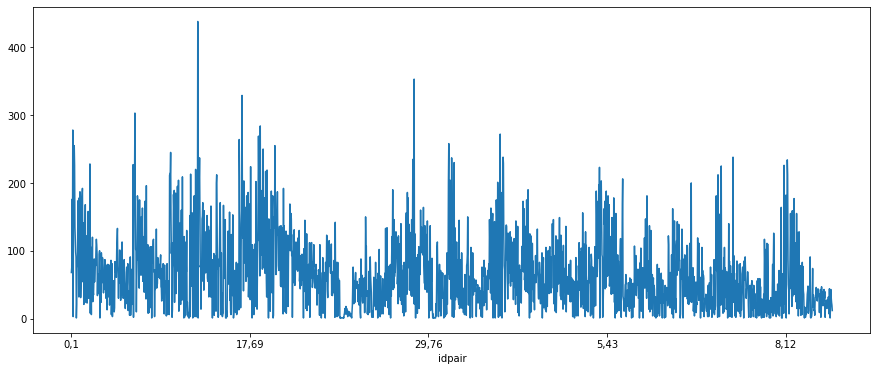

In [8]:
import matplotlib.pyplot as plt
tem = dftem.groupby('idpair').size()
tem.plot(figsize=(15, 6))
plt.show()

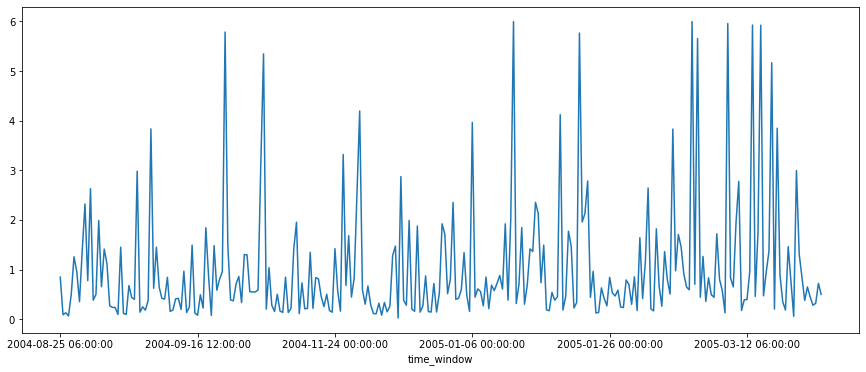

In [9]:
idsam = dftem.loc[dftem['idpair'] == '0,13']
idsam = idsam['intercontact']
idsam.plot(figsize=(15, 6))
plt.show()

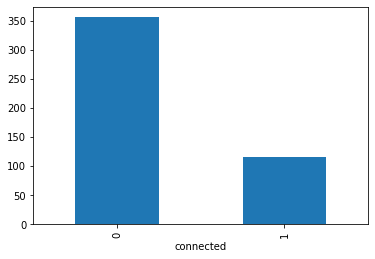

In [10]:
sampleLink = dataScaled.loc[dataScaled['idpair'] == '0,13']
sampleLink = sampleLink.loc['2004-07-01 00:00:00':'2004-11-31 12:00:00']
sampleLink.groupby(['connected']).size().plot(kind='bar')
#print(sampleLink)

UNTUK NODE 0,13 SAJA

In [11]:
sampleTrain = sampleLink.loc['2004-07-01 00:00:00':'2004-10-31 12:00:00']
sampleTrain = sampleLink[['intercontactScaled', 'SpatialLocScaled','connected']]

In [12]:
sampleTest = sampleLink.loc['2004-11-01 00:00:00':'2004-11-31 12:00:00']
sampleTest = sampleLink[['intercontactScaled', 'SpatialLocScaled','connected']]

In [13]:
print(sampleTrain.head(2))

                     intercontactScaled  SpatialLocScaled  connected
time_window                                                         
2004-07-19 12:00:00           -0.064323         -0.000845          0
2004-07-20 06:00:00           -0.064323         -0.000845          0


In [14]:
from sklearn.preprocessing import LabelBinarizer
x_train = sampleTrain[['intercontactScaled', 'SpatialLocScaled']].values
y_train = sampleTrain['connected'].values
lb = LabelBinarizer()
y_train= lb.fit_transform(y_train).ravel()


x_test = sampleTest[['intercontactScaled', 'SpatialLocScaled']].values
y_test = sampleTest['connected'].values
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test).ravel()
lb.classes_

array([0, 1])

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[356,   0],
       [ 38,  78]], dtype=int64)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9194915254237288
Precision: 1.0
Recall: 0.6724137931034483


In [19]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       356
           1       1.00      0.67      0.80       116

    accuracy                           0.92       472
   macro avg       0.95      0.84      0.88       472
weighted avg       0.93      0.92      0.91       472



In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.08050847457627118

UNTUK SEMUA NODE

In [21]:
sampleTrain1 = dataScaled.loc['2004-07-01 00:00:00':'2004-10-31 12:00:00']
sampleTrain1 = dataScaled[['intercontactScaled', 'SpatialLocScaled','connected']]

In [22]:
sampleTest1 = dataScaled.loc['2004-11-01 00:00:00':'2004-11-31 12:00:00']
sampleTest1 = dataScaled[['intercontactScaled', 'SpatialLocScaled','connected']]

In [23]:
print(sampleTrain.head(2))

                     intercontactScaled  SpatialLocScaled  connected
time_window                                                         
2004-07-19 12:00:00           -0.064323         -0.000845          0
2004-07-20 06:00:00           -0.064323         -0.000845          0


In [24]:
from sklearn.preprocessing import LabelBinarizer
x_train1 = sampleTrain1[['intercontactScaled','SpatialLocScaled']].values
y_train1 = sampleTrain1['connected'].values
lb = LabelBinarizer()
y_train1 = lb.fit_transform(y_train1).ravel()


x_test1 = sampleTest1[['intercontactScaled','SpatialLocScaled']].values
y_test1 = sampleTest1['connected'].values
lb = LabelBinarizer()
y_test1 = lb.fit_transform(y_test1).ravel()
lb.classes_

array([0, 1])

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train1, y_train1)
y_pred1 = model.predict(x_test1)

In [26]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix

array([[2471584,       0],
       [  67140,   70844]], dtype=int64)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))

Accuracy: 0.9742716035757643
Precision: 1.0
Recall: 0.5134218460111317


In [28]:
from sklearn.metrics import classification_report
y_pred1 = model.predict(x_test1)
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99   2471584
           1       1.00      0.51      0.68    137984

    accuracy                           0.97   2609568
   macro avg       0.99      0.76      0.83   2609568
weighted avg       0.97      0.97      0.97   2609568



In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.025728396424235734